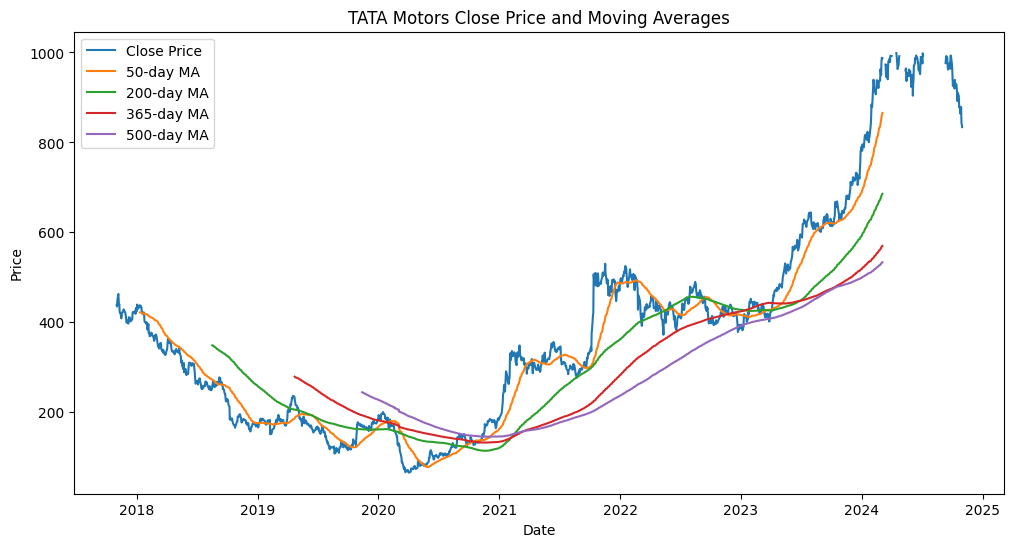

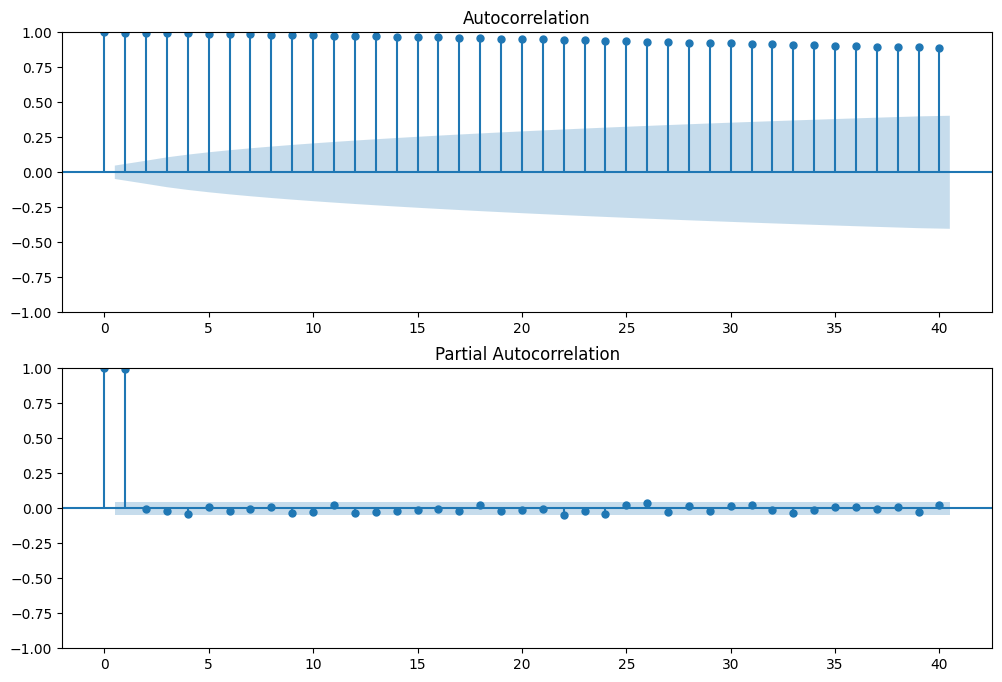

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1748
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -6012.285
Date:                Sun, 17 Nov 2024   AIC                          12040.569
Time:                        18:37:04   BIC                          12084.295
Sample:                             0   HQIC                         12056.734
                               - 1748                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2892      0.317      0.911      0.362      -0.333       0.911
ar.L2          0.6612      0.302      2.191      0.028       0.070       1.253
ar.L3         -0.0238      0.024     -1.001      0.3

In [13]:
import pandas as pd
import warnings
from statsmodels.tsa.arima.model import ARIMA

import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import statsmodels.api as sm

# Read the data
df = pd.read_csv('TATAMotorsData.csv')

# Check if 'Date' column exists
if 'Date' not in df.columns:
	raise KeyError("The 'Date' column is not found in the CSV file.")

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Ensure 'close' column is numeric
df['close'] = pd.to_numeric(df['close'], errors='coerce')

# Use 'close' price for analysis
data = df['close']

# Calculate moving averages
ma_50 = data.rolling(window=50).mean()
ma_200 = data.rolling(window=200).mean()
ma_365 = data.rolling(window=365).mean()
ma_500 = data.rolling(window=500).mean()

# Plot the close price and moving averages
plt.figure(figsize=(12,6))
plt.plot(data, label='Close Price')
plt.plot(ma_50, label='50-day MA')
plt.plot(ma_200, label='200-day MA')
plt.plot(ma_365, label='365-day MA')
plt.plot(ma_500, label='500-day MA')
plt.legend()
plt.title('TATA Motors Close Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Plot autocorrelation and partial autocorrelation
fig, ax = plt.subplots(2, figsize=(12,8))
sm.graphics.tsa.plot_acf(data.dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(data.dropna(), lags=40, ax=ax[1])
plt.show()

# Fit ARIMA model
model = ARIMA(data, order=(5,1,2))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())